In [ ]:
library(Seurat)
library(ggplot2)
library(dplyr)
library(stringr)
library(Sierra)
library(presto)
library(ggplot2)
library(msigdbr)
library(fgsea)
library(sctransform)
library(tidyverse)
setwd('/data/APAproject/post_qual/data/control_vs_pathology/')

In [2]:
reference.file <- '/home/aiden/data/refgenome/refdata-gex-GRCh38-2020-A/genes//genes.gtf'
gtf_gr <- rtracklayer::import(reference.file)
gtf_TxDb <- GenomicFeatures::makeTxDbFromGFF(reference.file, format="gtf")

Import genomic features from the file as a GRanges object ... 
OK

Prepare the 'metadata' data frame ... 
OK

Make the TxDb object ... 
Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
"The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored."
OK



In [3]:
#####
orgbc <- '/data/APAproject/post_qual/data/control_vs_pathology/sierra_ADsfg_CTshun/KapmannAD_CTshun_Sierra_aggregate/newbarcodes.tsv'
orgbc <- read.table(orgbc, header=F)
orgbc

V1
<chr>
AAACCTGAGAGCTTCT_SFG10
AAACCTGAGAGTACAT_SFG10
AAACCTGAGTATTGGA_SFG10
AAACCTGAGTGACATA_SFG10
AAACCTGCAAAGGAAG_SFG10
AAACCTGCACCTCGTT_SFG10
AAACCTGCAGACAAGC_SFG10
AAACCTGCAGCCACCA_SFG10
AAACCTGCAGTTAACC_SFG10


In [22]:
newbc <- orgbc %>% mutate(newbc=paste0(sub(".*_(.*)","\\1",orgbc$V1), "_",sub("(.*)_.*","\\1",orgbc$V1)))
sfg <- newbc[which(startsWith(newbc$newbc, 'SFG')),]
nc_idx <- newbc[which(startsWith(newbc$newbc, 'NC')),]
final_bcs <- data.frame(c(sfg$newbc,nc_idx$V1))

In [21]:
write.table(final_bcs,
           file='/data/APAproject/post_qual/data/control_vs_pathology/sierra_ADsfg_CTshun/KapmannAD_CTshun_Sierra_aggregate/barcodes2.tsv',
           col.names=F, row.names=F, quote=F)

In [23]:
######################################################################################################
######################################################################################################
peak.annotations <- read.table("sierra_ADsfg_CTshun/ADsfg_CTshun_peaks_annotated.txt", 
                               header = TRUE,
                               sep = "\t",
                               row.names = 1,
                               stringsAsFactors = FALSE)

In [24]:
peak.counts <- ReadPeakCounts(data.dir = "sierra_ADsfg_CTshun/KapmannAD_CTshun_Sierra_aggregate/")
peaks_so <- NewPeakSeurat(peak.data = peak.counts, 
                              annot.info = peak.annotations, 
                              min.cells = 50, min.peaks = 200)
peaks_so

[1] "Creating Seurat object with 440380 peaks and 116900 cells"


Warning message:
"The following arguments are not used: row.names"


[1] "Preparing feature table for DEXSeq"
[1] "No t-SNE coodinates included"
[1] "No UMAP coordinates included"


An object of class Seurat 
431298 features across 116897 samples within 1 assay 
Active assay: RNA (431298 features, 0 variable features)

# add the metadata to the peaks seurat object

In [25]:
sfg_ad_metadata <- read.table('../Dimitry_Velmeshev_ASD/rdata/ad_metadata.tsv')
sfg_ad_metadata

,orig.ident,nCount_RNA,nFeature_RNA,cellnames,clusters,main_celltype,cond,cells
,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
SFG10_AAACCTGAGAGCTTCT,PolyA,2116,1726,SFG10_AAACCTGAGAGCTTCT,SFG:Oligo.1,AD_Oligodendrocytes,AD,SFG10_AAACCTGAGAGCTTCT
SFG10_AAACCTGAGAGTACAT,PolyA,4916,3874,SFG10_AAACCTGAGAGTACAT,SFG:Oligo.1,AD_Oligodendrocytes,AD,SFG10_AAACCTGAGAGTACAT
SFG10_AAACCTGAGTATTGGA,PolyA,1148,981,SFG10_AAACCTGAGTATTGGA,SFG:Oligo.1,AD_Oligodendrocytes,AD,SFG10_AAACCTGAGTATTGGA
SFG10_AAACCTGAGTGACATA,PolyA,15140,10442,SFG10_AAACCTGAGTGACATA,SFG:Exc.3,AD_Excitatory_Neurons,AD,SFG10_AAACCTGAGTGACATA
SFG10_AAACCTGCAAAGGAAG,PolyA,6962,5336,SFG10_AAACCTGCAAAGGAAG,SFG:Exc.1,AD_Excitatory_Neurons,AD,SFG10_AAACCTGCAAAGGAAG
SFG10_AAACCTGCACCTCGTT,PolyA,1141,983,SFG10_AAACCTGCACCTCGTT,SFG:Micro,AD_Microglia,AD,SFG10_AAACCTGCACCTCGTT
SFG10_AAACCTGCAGACAAGC,PolyA,1183,1014,SFG10_AAACCTGCAGACAAGC,SFG:Oligo.1,AD_Oligodendrocytes,AD,SFG10_AAACCTGCAGACAAGC
SFG10_AAACCTGCAGCCACCA,PolyA,2119,1642,SFG10_AAACCTGCAGCCACCA,SFG:Oligo.1,AD_Oligodendrocytes,AD,SFG10_AAACCTGCAGCCACCA
SFG10_AAACCTGCAGTTAACC,PolyA,1059,921,SFG10_AAACCTGCAGTTAACC,SFG:OPC,AD_OPC,AD,SFG10_AAACCTGCAGTTAACC


In [32]:
nc_metadata <- read.table('/data1/APA/Shun_Lau/data/rdata/control_NC_metadata.tsv')
nc_metadata
rownames(nc_metadata) <- nc_metadata$cellnames

,orig.ident,nCount_RNA,nFeature_RNA,cellnames,percent.mt,nCount_SCT,nFeature_SCT,samples,condition,predicted.id,⋯,prediction.score.AST.FB,subcelltypes,cond,celltype,ct_cnd,barcodes,authors_ID,authors_celltype,celltype_auth,ct_cnd2
,<chr>,<int>,<int>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,⋯,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
AAACCCAGTCCGGTGT_11,SeuratProject,3704,2812,AAACCCAGTCCGGTGT_NC11,7.692308,686,542,NC11,NC,OPC,⋯,0.015609964,OPC,NC,OPC,NC_OPC,AAACCCAGTCCGGTGT_11,AAACCCAGTCCGGTGT_11,Excit,Excit,NC_Excit
AAACGCTGTACCACGC_11,SeuratProject,4394,3297,AAACGCTGTACCACGC_NC11,8.831169,752,606,NC11,NC,OPC,⋯,0.000000000,OPC,NC,OPC,NC_OPC,AAACGCTGTACCACGC_11,AAACGCTGTACCACGC_11,Excit,Excit,NC_Excit
AAAGGATTCCAGTGCG_11,SeuratProject,3270,2590,AAAGGATTCCAGTGCG_NC11,6.238361,998,791,NC11,NC,Microglia,⋯,0.049634059,Microglia,NC,Microglia,NC_Microglia,AAAGGATTCCAGTGCG_11,AAAGGATTCCAGTGCG_11,Mic,Mic,NC_Mic
AAAGGATTCGATACAC_11,SeuratProject,3573,2656,AAAGGATTCGATACAC_NC11,5.714286,717,522,NC11,NC,AST-PP,⋯,0.374914547,AST-PP,NC,Astrocytes,NC_Astrocytes,AAAGGATTCGATACAC_11,AAAGGATTCGATACAC_11,Astro,Astro,NC_Astro
AAAGGTAGTAAGTTGA_11,SeuratProject,2762,2180,AAAGGTAGTAAGTTGA_NC11,9.517241,703,571,NC11,NC,Oligodendrocytes,⋯,0.000000000,Oligodendrocytes,NC,Excitatory_Neurons,NC_Excitatory_Neurons,AAAGGTAGTAAGTTGA_11,AAAGGTAGTAAGTTGA_11,Mic,Mic,NC_Mic
AAATGGACATTGCAAC_11,SeuratProject,2122,1615,AAATGGACATTGCAAC_NC11,8.627451,546,389,NC11,NC,Microglia,⋯,0.000000000,Microglia,NC,Microglia,NC_Microglia,AAATGGACATTGCAAC_11,AAATGGACATTGCAAC_11,Mic,Mic,NC_Mic
AACCAACGTCACTACA_11,SeuratProject,2957,2132,AACCAACGTCACTACA_NC11,3.866432,586,434,NC11,NC,Oligodendrocytes,⋯,0.000000000,Oligodendrocytes,NC,Oligodendrocytes,NC_Oligodendrocytes,AACCAACGTCACTACA_11,AACCAACGTCACTACA_11,Oligo,Oligo,NC_Oligo
AACCAACTCTCTCGAC_11,SeuratProject,6903,4971,AACCAACTCTCTCGAC_NC11,4.994903,913,744,NC11,NC,OPC,⋯,0.000000000,OPC,NC,OPC,NC_OPC,AACCAACTCTCTCGAC_11,AACCAACTCTCTCGAC_11,Excit,Excit,NC_Excit
AACGAAATCTCGGTAA_11,SeuratProject,6598,4632,AACGAAATCTCGGTAA_NC11,8.383234,1192,994,NC11,NC,AST-PP,⋯,0.024651582,AST-PP,NC,Astrocytes,NC_Astrocytes,AACGAAATCTCGGTAA_11,AACGAAATCTCGGTAA_11,Astro,Astro,NC_Astro


In [27]:
sfg_ad_metadata$ct_cnd <- sfg_ad_metadata$main_celltype

In [38]:
all_metadata <- bind_rows(nc_metadata,sfg_ad_metadata)

In [33]:
peaks_so <- AddMetaData(peaks_so, metadata = nc_metadata)
peaks_so <- AddMetaData(peaks_so, metadata = sfg_ad_metadata)
table(peaks_so$ct_cnd)


        AD_Astrocytes        AD_Endothelial AD_Excitatory_Neurons 
                 7911                  1049                 18735 
AD_Inhibitory_Neurons          AD_Microglia   AD_Oligodendrocytes 
                 7603                  4033                 17968 
               AD_OPC 
                 3396 

In [47]:
peaks_so$cellnames <- Cells(peaks_so)
peaks_so <- subset(peaks_so, subset = cellnames %in% rownames(all_metadata))
peaks_so <- AddMetaData(peaks_so, metadata = all_metadata)
peaks_so

An object of class Seurat 
431298 features across 114725 samples within 1 assay 
Active assay: RNA (431298 features, 0 variable features)

In [46]:
sum(table(peaks_so$ct_cnd))

[1] 114725

# do the UTR shift analysis

In [48]:
peaks_so <- SetIdent(peaks_so, value = peaks_so$ct_cnd)

[1] "6444 expressed peaks in feature types UTR3"
[1] "6001 peaks after filtering out A-rich annotations"
[1] "1228 genes detected with multiple peak sites expressed"
[1] "3542 individual peak sites to test"


converting counts to integer mode

Warning message in DESeqDataSet(rse, design, ignoreRank = TRUE):
"some variables in design formula are characters, converting to factors"


[1] "Running DEXSeq test..."


-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.

Warning message in vst(exp(alleffects), object):
"Dispersion function not parametric, applying log2(x+ 1) instead of vst...
"


[1] "Detecting shifts in 3'UTR length usage"


,genomic_feature(s),population1_pct,population2_pct,pvalue,padj,Log2_fold_change,SiteLocation,NumSites,FC_direction
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>
GABRA1:chr5:161899537-161899981:1,UTR3,0.3643982,0.22624203,0.000000e+00,0.000000e+00,0.6992836,5,5,Up
GABRA1:chr5:161898743-161899786:1,UTR3,0.3093675,0.22181869,1.198483e-111,9.350281e-111,0.4274785,4,5,Up
MATR3:chr5:139329964-139330511:1,UTR3,0.3301308,0.30027471,0.000000e+00,0.000000e+00,0.7026555,4,4,Up
MATR3:chr5:139329518-139330106:1,UTR3,0.1408594,0.15877450,3.762241e-15,9.525273e-15,0.2537157,3,4,Up
PRKAR1A:chr17:68532341-68532829:1,UTR3,0.2803309,0.18745635,0.000000e+00,0.000000e+00,0.5446718,2,2,Up
YWHAH:chr22:31957136-31957603:1,UTR3,0.5716573,0.33836197,0.000000e+00,0.000000e+00,0.3481006,2,2,Up
KHDRBS3:chr8:135644987-135647307:1,UTR3,0.2090739,0.10527541,0.000000e+00,0.000000e+00,1.2262666,3,4,Up
KHDRBS3:chr8:135644722-135656722:1,UTR3,0.3416066,0.28011361,8.467877e-119,6.958984e-118,0.4218857,2,4,Up
KHDRBS3:chr8:135647220-135647615:1,UTR3,0.1037096,0.05647902,9.462458e-71,5.040004e-70,0.8436345,4,4,Up


[1] "Wilcoxon Rank-sum test comparing relative peak locations for up- vs down-regulated peaks:"
[1] "P-value = 1.09124610561974e-20"


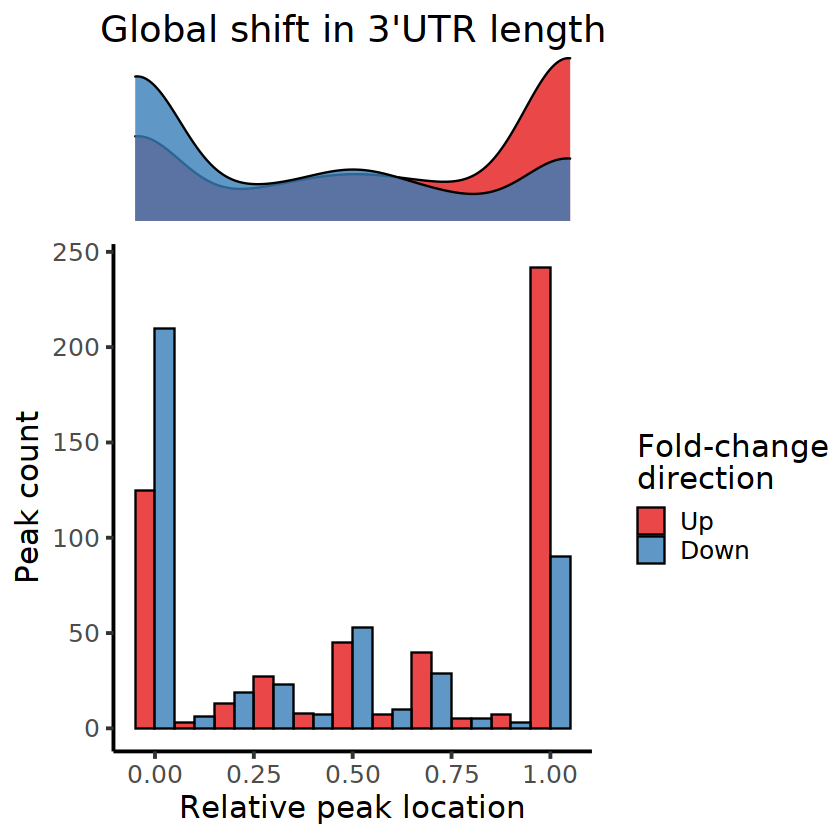

In [49]:
exc_utr_shift <- DetectUTRLengthShift(peaks.object = peaks_so, 
                                      gtf_gr = gtf_gr,
                                      gtf_TxDb = gtf_TxDb,
                                      population.1 = 'AD_Excitatory_Neurons', 
                                      population.2 = 'NC_Excitatory_Neurons')
exc_utr_shift
PlotUTRLengthShift(exc_utr_shift)

In [54]:
table(peaks_so$cond)


   AD    NC 
60695 54030 

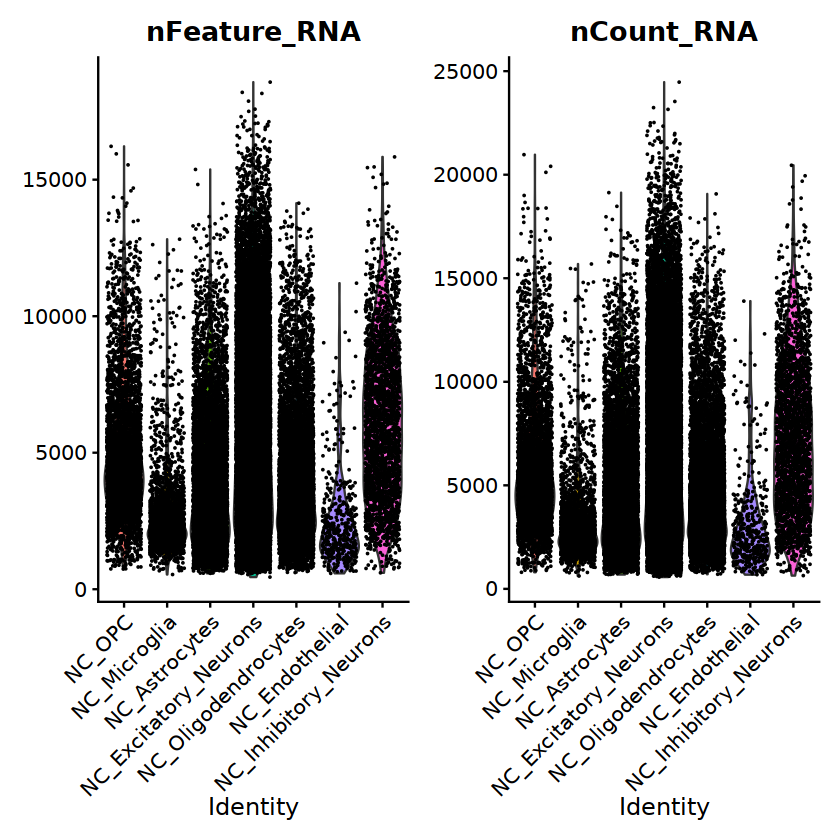

In [55]:
peaks_so_NC <- subset(peaks_so, subset= cond =='NC')
VlnPlot(peaks_so_NC, features = c("nFeature_RNA", "nCount_RNA"), ncol = 2)

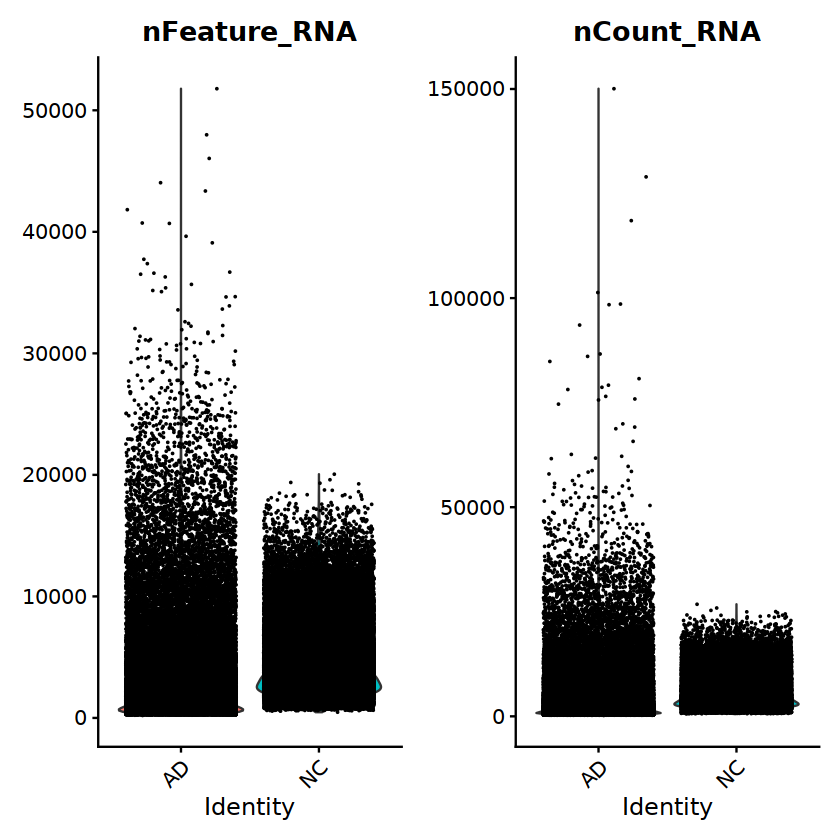

In [58]:
peaks_so <- SetIdent(peaks_so, value = peaks_so$cond)
VlnPlot(peaks_so, features = c("nFeature_RNA", "nCount_RNA"), ncol = 2)

In [59]:
count_per_sample <- data.frame(samples=peaks_so$samples, peak_count=peaks_so$nCount_RNA,
                               features=peaks_so$nFeature_RNA)
count_per_sample <- count_per_sample %>%
  group_by(samples) %>%
  summarise(median_peak_count = median(peak_count), median_feature_count=median(features))
count_per_sample

samples,median_peak_count,median_feature_count
<chr>,<dbl>,<dbl>
NC11,3599,2712.0
NC12,4578,3905.0
NC14,6053,5094.0
NC15,5696,4868.0
NC16,1781,1439.0
NC17,4583,3932.5
NC18,5267,4424.0
NC3,5008,4138.0
NC7,5026,4221.0


In [62]:
peaks_so_nc <- subset(peaks_so, subset= cond=='NC')
mean(peaks_so_nc$nCount_RNA)

[1] 5602.295

In [1]:
peaks_so

ERROR: Error in eval(expr, envir, enclos): object 'peaks_so' not found
